# Lab 4 - Part B: Building models to optimise a function
The goal of this part of the practical is to implement steepest descent and Newton's method on a 2-dimensional function.

This code finds the optimum of Rosenbrock's function - the definition is in the class `Rosenbrock` in [functions.py](functions.py) - look it up on the web! In order to make this work you will need to calculate the first and second derivatives of the function by hand, and then implement them in the `Rosenbrock` class. 

##### Things to investigate once you have gotten this to work
1. Change the routine to use steepest descent (Eq B.4 in the book's Appendix) rather than Newton's method. This has been defined in the same way as Newton's method in [optimisation.py](optimisation.py) - you just need to specify the update rule.
2. Implement the first derivative using finite differences rather than explicitly writing down the derivative. You may want to use the class in [numerical.py](numerical.py) for this.

### Import modules

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('machinevision.mplstyle')

from functions import Rosenbrock, rosenbrock
from optimisation import SteepestDescent, NewtonMethod, optimise

# Define model and create data

In [5]:
x1, x2 = np.mgrid[-1.5:1.5:0.01, -1.5:1.5:0.01]
x = np.stack((x2, x1))
w = rosenbrock(x)

# Perform optimisation
Newton's method for optimisation has been implemented for you in [optimisation.py](optimisation.py), as the function named '`optimise`'. Given a start position and tolerance, '`optimise`' can optimize different functions. Each (mathematical) function is passed in as a class definition, which is expected to implement three methods so that '`optimise`' can apply Newton's method: 
1. '`call`' : returns the function value at a given `x` 
2. '`jacobian`' : returns the jacobian for that function at a given `x` 
3. '`hessian`' : returns the hessian for that function at a given `x` 

**TODO:** Here we will be optimizing the Rosenbrock function. You can find a placeholder for this function in [functions.py](functions.py). Complete the '`jacobian'` and '`hessian`' methods, and verify that '`optimise`'  correctly finds the minimum of the Rosenbrock function. You may assume `x` two-dimensional.

In [16]:
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=NewtonMethod)

Iteration    1, Function 4.731547058170665
Iteration    2, Function 4.045594387999576
Iteration    3, Function 3.1598667654807837
Iteration    4, Function 1.9546545285535109
Iteration    5, Function 1.253669992452088
Iteration    6, Function 0.6661552742395613
Iteration    7, Function 0.32398508870237475
Iteration    8, Function 0.10964145743460543
Iteration    9, Function 0.02050229233533074
Iteration   10, Function 6.284687681427676e-05
Iteration   11, Function 1.746318395363031e-07
Iteration   12, Function 5.160738939459464e-13


In [18]:
from numerical import finite_difference
rosenbrock = finite_difference(Rosenbrock)

start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=SteepestDescent)

Iteration    1, Function 4.128339552638412
Iteration    2, Function 4.119388340560535
Iteration    3, Function 4.108166507312863
Iteration    4, Function 4.103224906709695
Iteration    5, Function 4.095889043753336
Iteration    6, Function 4.091317458596973
Iteration    7, Function 4.082560079561166
Iteration    8, Function 4.075904176395502
Iteration    9, Function 4.05425204805291
Iteration   10, Function 4.03475034790544
Iteration   11, Function 2.90437415309044
Iteration   12, Function 2.7053195683089073
Iteration   13, Function 2.644090188218147
Iteration   14, Function 2.5811733854243144
Iteration   15, Function 2.5457649270395417
Iteration   16, Function 2.5077281715059483
Iteration   17, Function 2.4811103951523776
Iteration   18, Function 2.4519204391358516
Iteration   19, Function 2.4296478390056695
Iteration   20, Function 2.4047872653411755
Iteration   21, Function 2.3845686127928674
Iteration   22, Function 2.3616019713616745
Iteration   23, Function 2.3419991374541564
Ite

# Visualise results

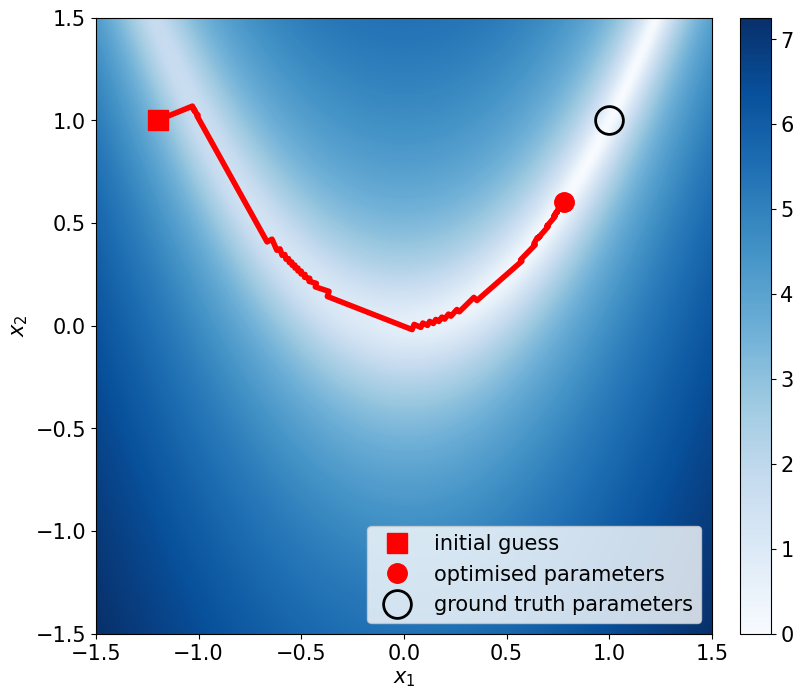

In [19]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right')
plt.show()

If you have correctly implemented the derivatives then the optimised parameters should have converged to approximately the same as the ground truth minimum. 

Great! Now try the extra tasks outlined [above](#Things-to-investigate-once-you-have-gotten-this-to-work).